In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("netflix1.csv")
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [4]:
data.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [5]:
data.shape

(8790, 10)

## Check for duplicate

In [6]:
a=data.duplicated()


In [7]:
data[a]

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in


## Checking for Null Values

In [8]:
data.isnull()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
8785,False,False,False,False,False,False,False,False,False,False
8786,False,False,False,False,False,False,False,False,False,False
8787,False,False,False,False,False,False,False,False,False,False
8788,False,False,False,False,False,False,False,False,False,False


In [9]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

## 1) Percentage of content type (movie,Tv show) 

<AxesSubplot: ylabel='type'>

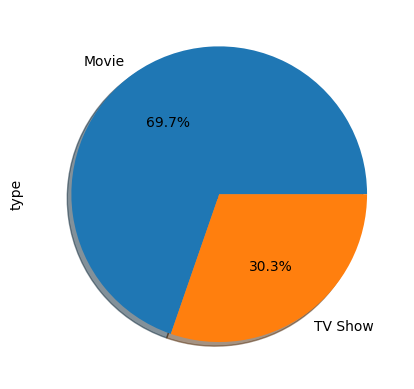

In [10]:
data['type'].value_counts().plot(kind="pie",autopct='%1.1f%%',shadow=True)


## 2) Director with highest shows


In [11]:
top_dire=data['director'].value_counts().sort_values(ascending=False)
top_dire

Not Given                    2588
Rajiv Chilaka                  20
Alastair Fothergill            18
Raúl Campos, Jan Suter         18
Suhas Kadav                    16
                             ... 
N.D. Wilson                     1
Curtis Hanson                   1
Christian E. Christiansen       1
Bruce Robinson                  1
Mozez Singh                     1
Name: director, Length: 4528, dtype: int64

In [12]:
filtered_data = data[data['director'] != 'Not Given']
director_counts = filtered_data['director'].value_counts()
director_counts


Rajiv Chilaka                     20
Raúl Campos, Jan Suter            18
Alastair Fothergill               18
Marcus Raboy                      16
Suhas Kadav                       16
                                  ..
Matt D'Avella                      1
Parthiban                          1
Scott McAboy                       1
Raymie Muzquiz, Stu Livingston     1
Mozez Singh                        1
Name: director, Length: 4527, dtype: int64

In [13]:
top_directors = director_counts.head(10)
top_directors

Rajiv Chilaka             20
Raúl Campos, Jan Suter    18
Alastair Fothergill       18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
Jay Chapman               12
Martin Scorsese           12
Name: director, dtype: int64

In [14]:
top_directors.index

Index(['Rajiv Chilaka', 'Raúl Campos, Jan Suter', 'Alastair Fothergill',
       'Marcus Raboy', 'Suhas Kadav', 'Jay Karas', 'Cathy Garcia-Molina',
       'Youssef Chahine', 'Jay Chapman', 'Martin Scorsese'],
      dtype='object')

In [15]:
top_directors.values

array([20, 18, 18, 16, 16, 14, 13, 12, 12, 12], dtype=int64)

Text(0.5, 1.0, 'top 10 directors')

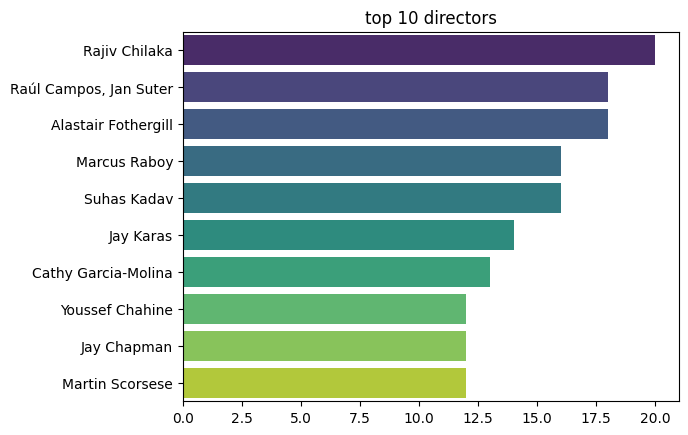

In [16]:

bar_chart=sns.barplot(x=top_directors.values, y=top_directors.index, data=data,palette='viridis')
bar_chart.set_title("top 10 directors")

## 3) Variation of Movie release from 2010 to 2020

In [17]:
years = data[(data['release_year'] >= 2010) & (data['release_year'] <= 2021)]
years

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,9/24/2021,2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [18]:
year_count=years['release_year'].value_counts()
year_count=year_count.head(10)
year_count

2018    1146
2019    1030
2017    1030
2020     953
2016     901
2021     592
2015     555
2014     352
2013     286
2012     236
Name: release_year, dtype: int64

In [19]:
year_count.index

Int64Index([2018, 2019, 2017, 2020, 2016, 2021, 2015, 2014, 2013, 2012], dtype='int64')

In [20]:
year_count.values

array([1146, 1030, 1030,  953,  901,  592,  555,  352,  286,  236],
      dtype=int64)

<AxesSubplot: >

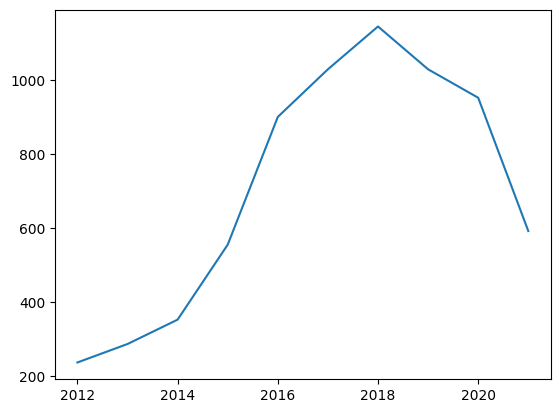

In [21]:
sns.lineplot(x=year_count.index, y=year_count.values)


## 4) countries with highst shows

In [22]:
top_country=data['country'].value_counts()
top_country=top_country.head(3)


In [23]:
top_country.index

Index(['United States', 'India', 'United Kingdom'], dtype='object')

In [24]:
top_country.values

array([3240, 1057,  638], dtype=int64)

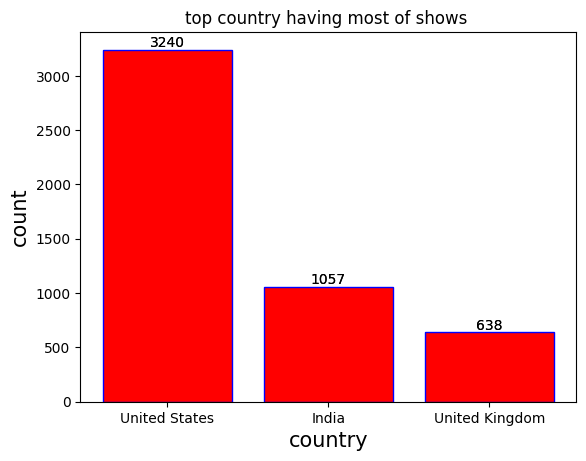

In [64]:
country_chart=sns.barplot(x=top_country.index, y=top_country.values, data=data)
plt.title("top country having most of shows ")
plt.ylabel("count",fontsize=15)
plt.xlabel("country",fontsize=15)
plt.bar(top_country.index,top_country.values,color='r',edgecolor='b')
#to show values on bars
for i in country_chart.containers:
    country_chart.bar_label(i)


# 5) latest indian shows released for kids


In [26]:
ind_kids_shows=(data['listed_in'] == "Kids' TV") & (data['country'] == 'India')
data[ind_kids_shows].sort_values(by='release_year',ascending=False)


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
6560,s40,TV Show,Chhota Bheem,Rajiv Chilaka,India,9/16/2021,2021,TV-Y7,3 Seasons,Kids' TV
7285,s2665,TV Show,ChuChu TV Nursery Rhymes & Kids Songs (Hindi),Not Given,India,4/18/2020,2019,TV-Y,1 Season,Kids' TV
8684,s8122,TV Show,Super Bheem,Not Given,India,6/28/2019,2019,TV-Y,1 Season,Kids' TV
8724,s8374,TV Show,The Jungle Book,Not Given,India,5/11/2019,2010,TV-Y7,1 Season,Kids' TV


## 6) Count of shows Ind vs Pak 

<AxesSubplot: ylabel='country'>

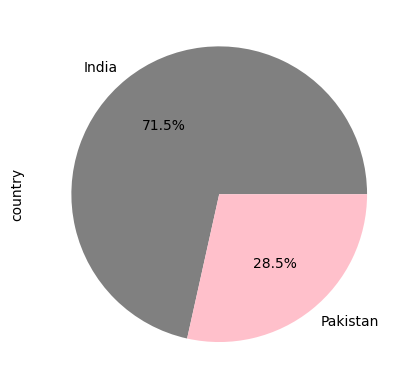

In [27]:
filter_country=data[(data['country']=='India') | (data['country']=='Pakistan')]
filter_country['country'].value_counts().plot(kind="pie",autopct='%1.1f%%',colors=["gray", "pink"])

## 7) Count of Indian shows rating released in 2021 

<AxesSubplot: xlabel='rating', ylabel='count'>

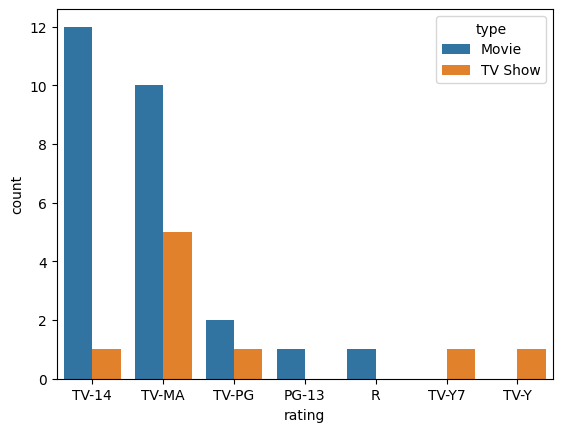

In [28]:
filter_data=data[(data['country']=='India') & (data['release_year']==2021)]
sns.countplot(x='rating',data=filter_data,hue='type')